# Exploring convolutional layers


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.18.0


## Load the MNIST dataset

The Keras library comes with a number of builtin datasets. One of which is the MNIST library of handwritten digits

In [2]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Play with the data
The training library consists of 60,000 images and each image is 28x28 pixels. There are 60,000 labels to go with the images. Each label is one of the digits (0:9).

In [3]:
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("First label:",train_labels[0])
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

Shape of training images: (60000, 28, 28)
Length of training set labels: 60000
First label: 5
Shape of testing images: (10000, 28, 28)
Length of testing set labels: 10000


In [4]:

#Normalise and reshape images so that they have 1 feature
train_images=train_images/255.0
test_images=test_images/255.0
train_images=np.reshape(train_images,(60000,28,28,1))
test_images=np.reshape(test_images,(10000,28,28,1))

## Building our neural network

Now we will use Keras to build our neural network. 

### Set up the layers

A neural network is made up of layers and in the simple case these layers are applied sequentially.

In [5]:


## Altenratively we can use the functional API where one has to code the dependence between layers explictly
# In most situations in this course the Sequential API is easier to use, but the functional API offers much more freedom
input_layer =  keras.layers.Input(shape=(28,28,1))
conv1=keras.layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
drop1=keras.layers.MaxPooling2D((2, 2))(conv1)
conv2=keras.layers.Conv2D(32, (3, 3), activation='relu')(drop1)
drop2=keras.layers.MaxPooling2D((2, 2))(conv2)
flatten_layer = keras.layers.Flatten()(drop2)
Layer_2 = keras.layers.Dense(20, activation="sigmoid")(flatten_layer)
output_layer= keras.layers.Dense(10, activation="linear")(Layer_2)
##Defining the model by specifying the input and output layers
model = keras.models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        16,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,798 (100.77 KB)

 Trainable params: 25,798 (100.77 KB)

 Non-trainable params: 0 (0.00 B)

## From layers to a compiled model

Before we can train the model we need to determine the:
- *Loss function* - This is used to tell us how well our model is doing in
- *Optimiser* - This is how the model gets updated based on the data and the loss function
- *Metrics* - Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [6]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',
              metrics=['accuracy'])

## Train the model
To train the model we need to show the training data to the model. In our case the training data is the `train_images` and `train_labels` arrays. The model will hopefully *learn* how to associate the images and the labels.

### Fitting the model to the data
The training process is also called fitting the model to the data (for obvious reasons). The Keras syntax for fitting the model uses `model.fit`

In [7]:
history=model.fit(train_images, train_labels,batch_size=256, epochs=20)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.4611 - loss: 1.8335
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9344 - loss: 0.5648
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9579 - loss: 0.3002
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9670 - loss: 0.2010
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9739 - loss: 0.1480
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9780 - loss: 0.1191
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9805 - loss: 0.1005
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9835 - loss: 0.0811
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9841 - loss: 0.0730
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9869 - loss: 0.0634
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9883 - loss: 0.0538
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In the above output you can see that the model improves the loss (this number gets smaller) and accuracy (this number gets bigger) with each epoch. But doing well on the training data set is a bit like marking your own homework. A fairer test is to evaluate the performance on the testing data set (which the model has not seen).

### Testing the performance

In [8]:
print(np.shape(test_images))
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#print('\nTest accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 - 1s - 4ms/step - accuracy: 0.9890 - loss: 0.0369


So when I ran this I found a accuracy on the training dataset of 99.50% but the accuracy on the testing datset was 98.80%. Perfroming better on the training than testing datset is an indication of overfitting (which will be dicussed in more detail later in the course).

The output of the test_range function is the list of predicted and true labels for the range. For each prediction the associated probability array is also printed.

## Interrograting the training
`keras.fit` returns a hitsory object that contains the evolution of the loss an accuracry metrics as a function of epoch. This allows us to see how quickly the fitting process is converging.

Text(0, 0.5, 'Loss')

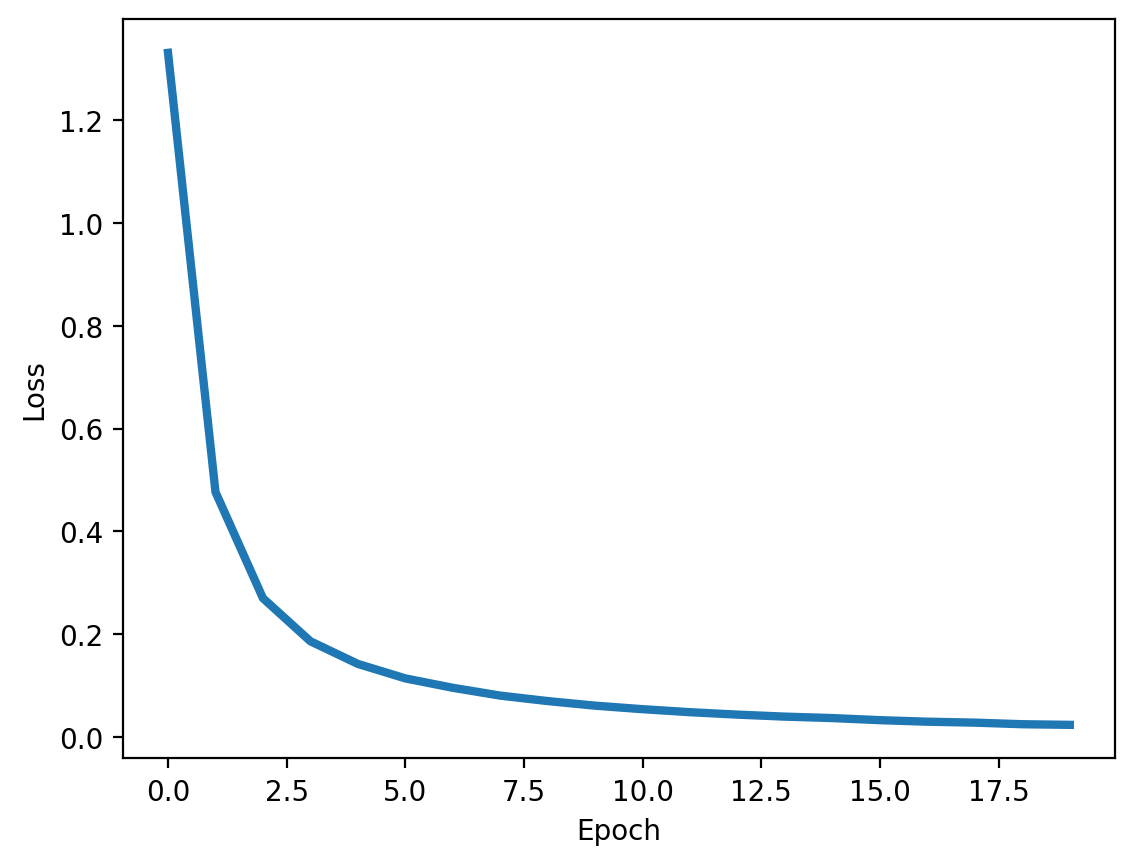

In [9]:
fig,ax=plt.subplots()
ax.plot(history.history['loss'], linewidth=3)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

Text(0, 0.5, 'Accuracy')

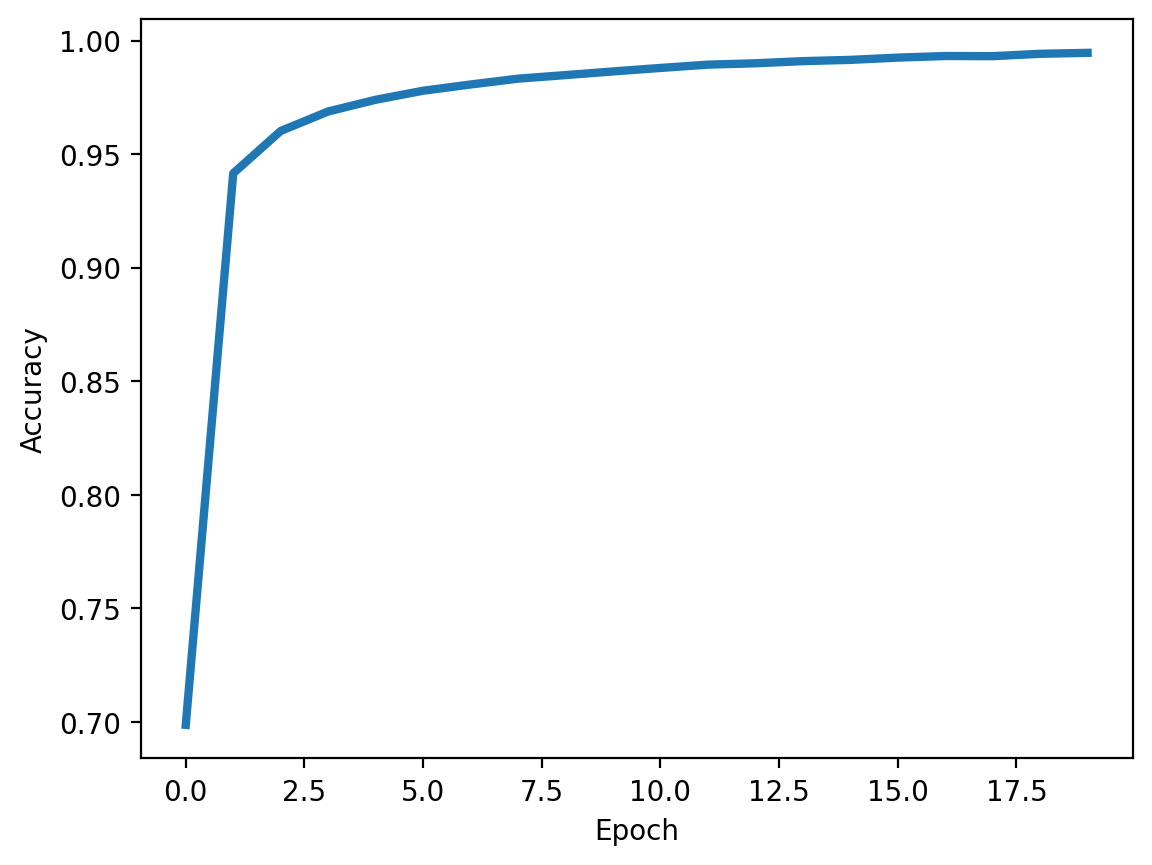

In [10]:
fig,ax=plt.subplots()
ax.plot(history.history['accuracy'], linewidth=3)
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")

## Looking at those convoltional layers

In [15]:

modelFirstConv = keras.models.Model(inputs=input_layer, outputs=conv1)
modelFirstConv.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

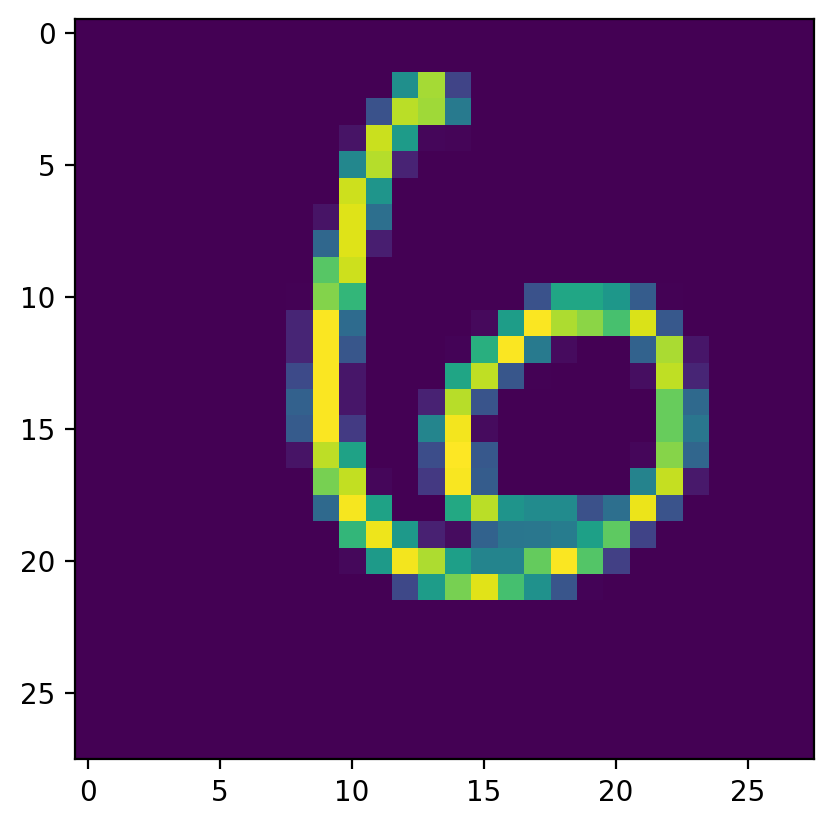

In [32]:
plt.imshow(test_images[100])

In [39]:
testout=modelFirstConv(test_images)  #What craziness is this?
print(testout.shape)

(10000, 26, 26, 32)


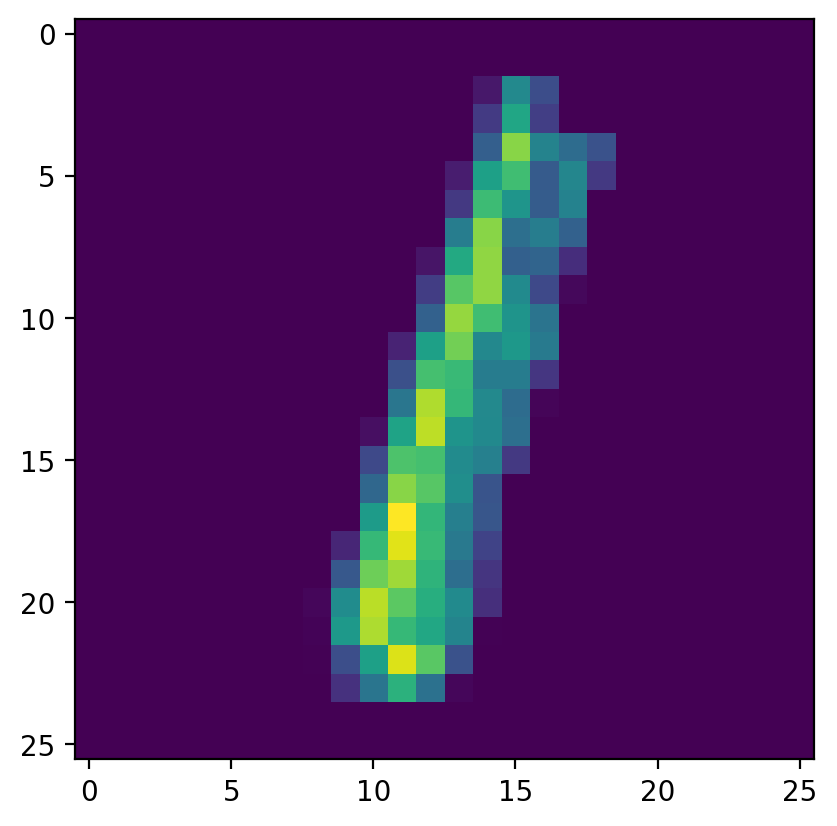

In [41]:
plt.imshow(testout[2,:,:,0])

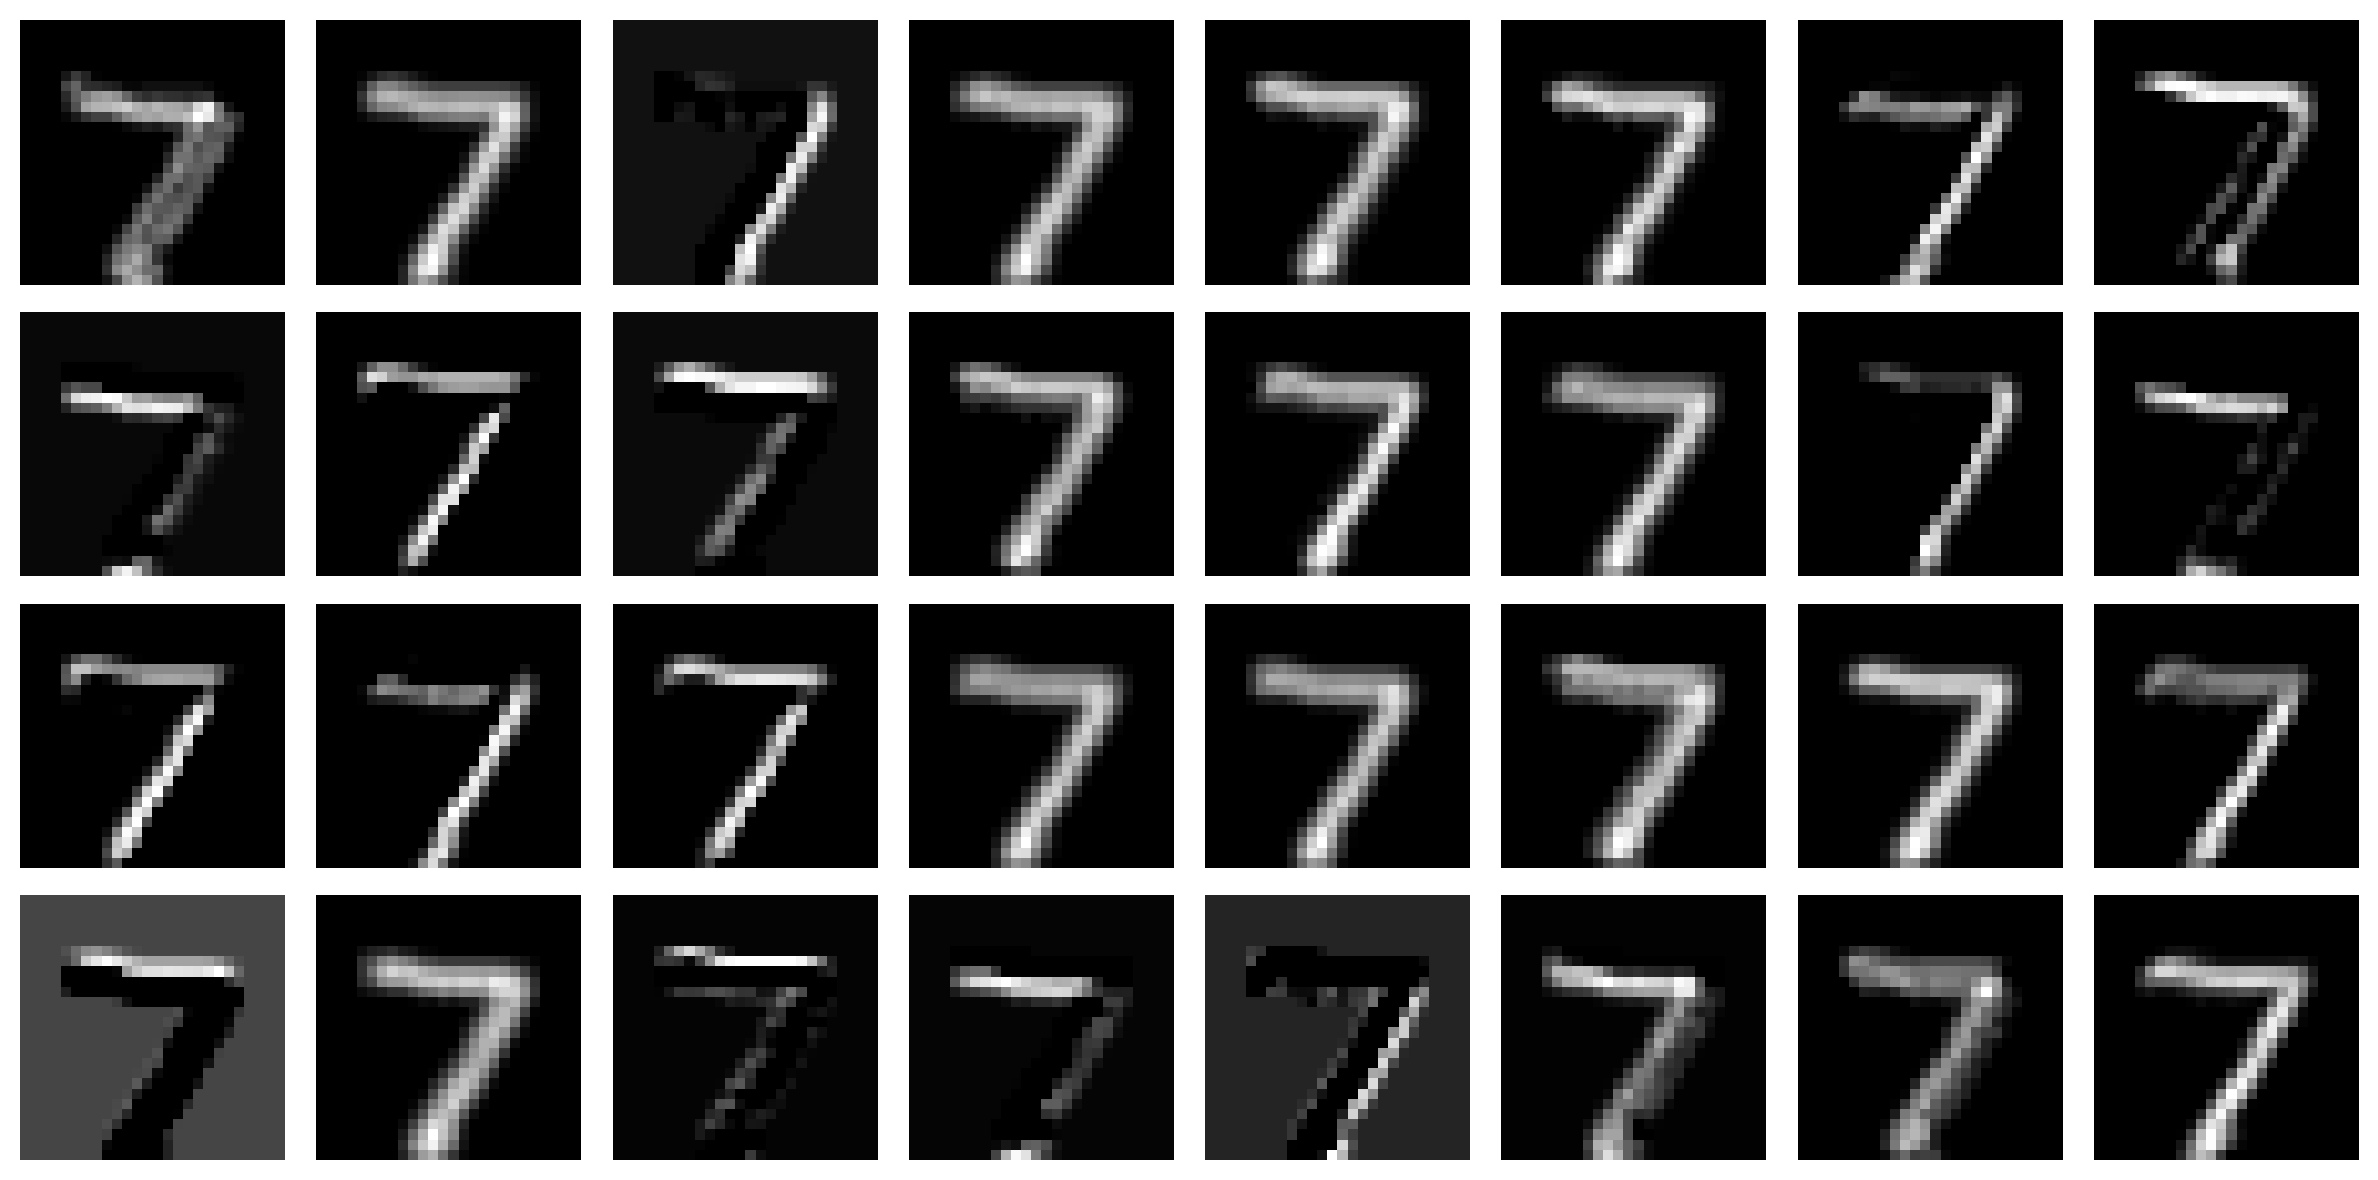

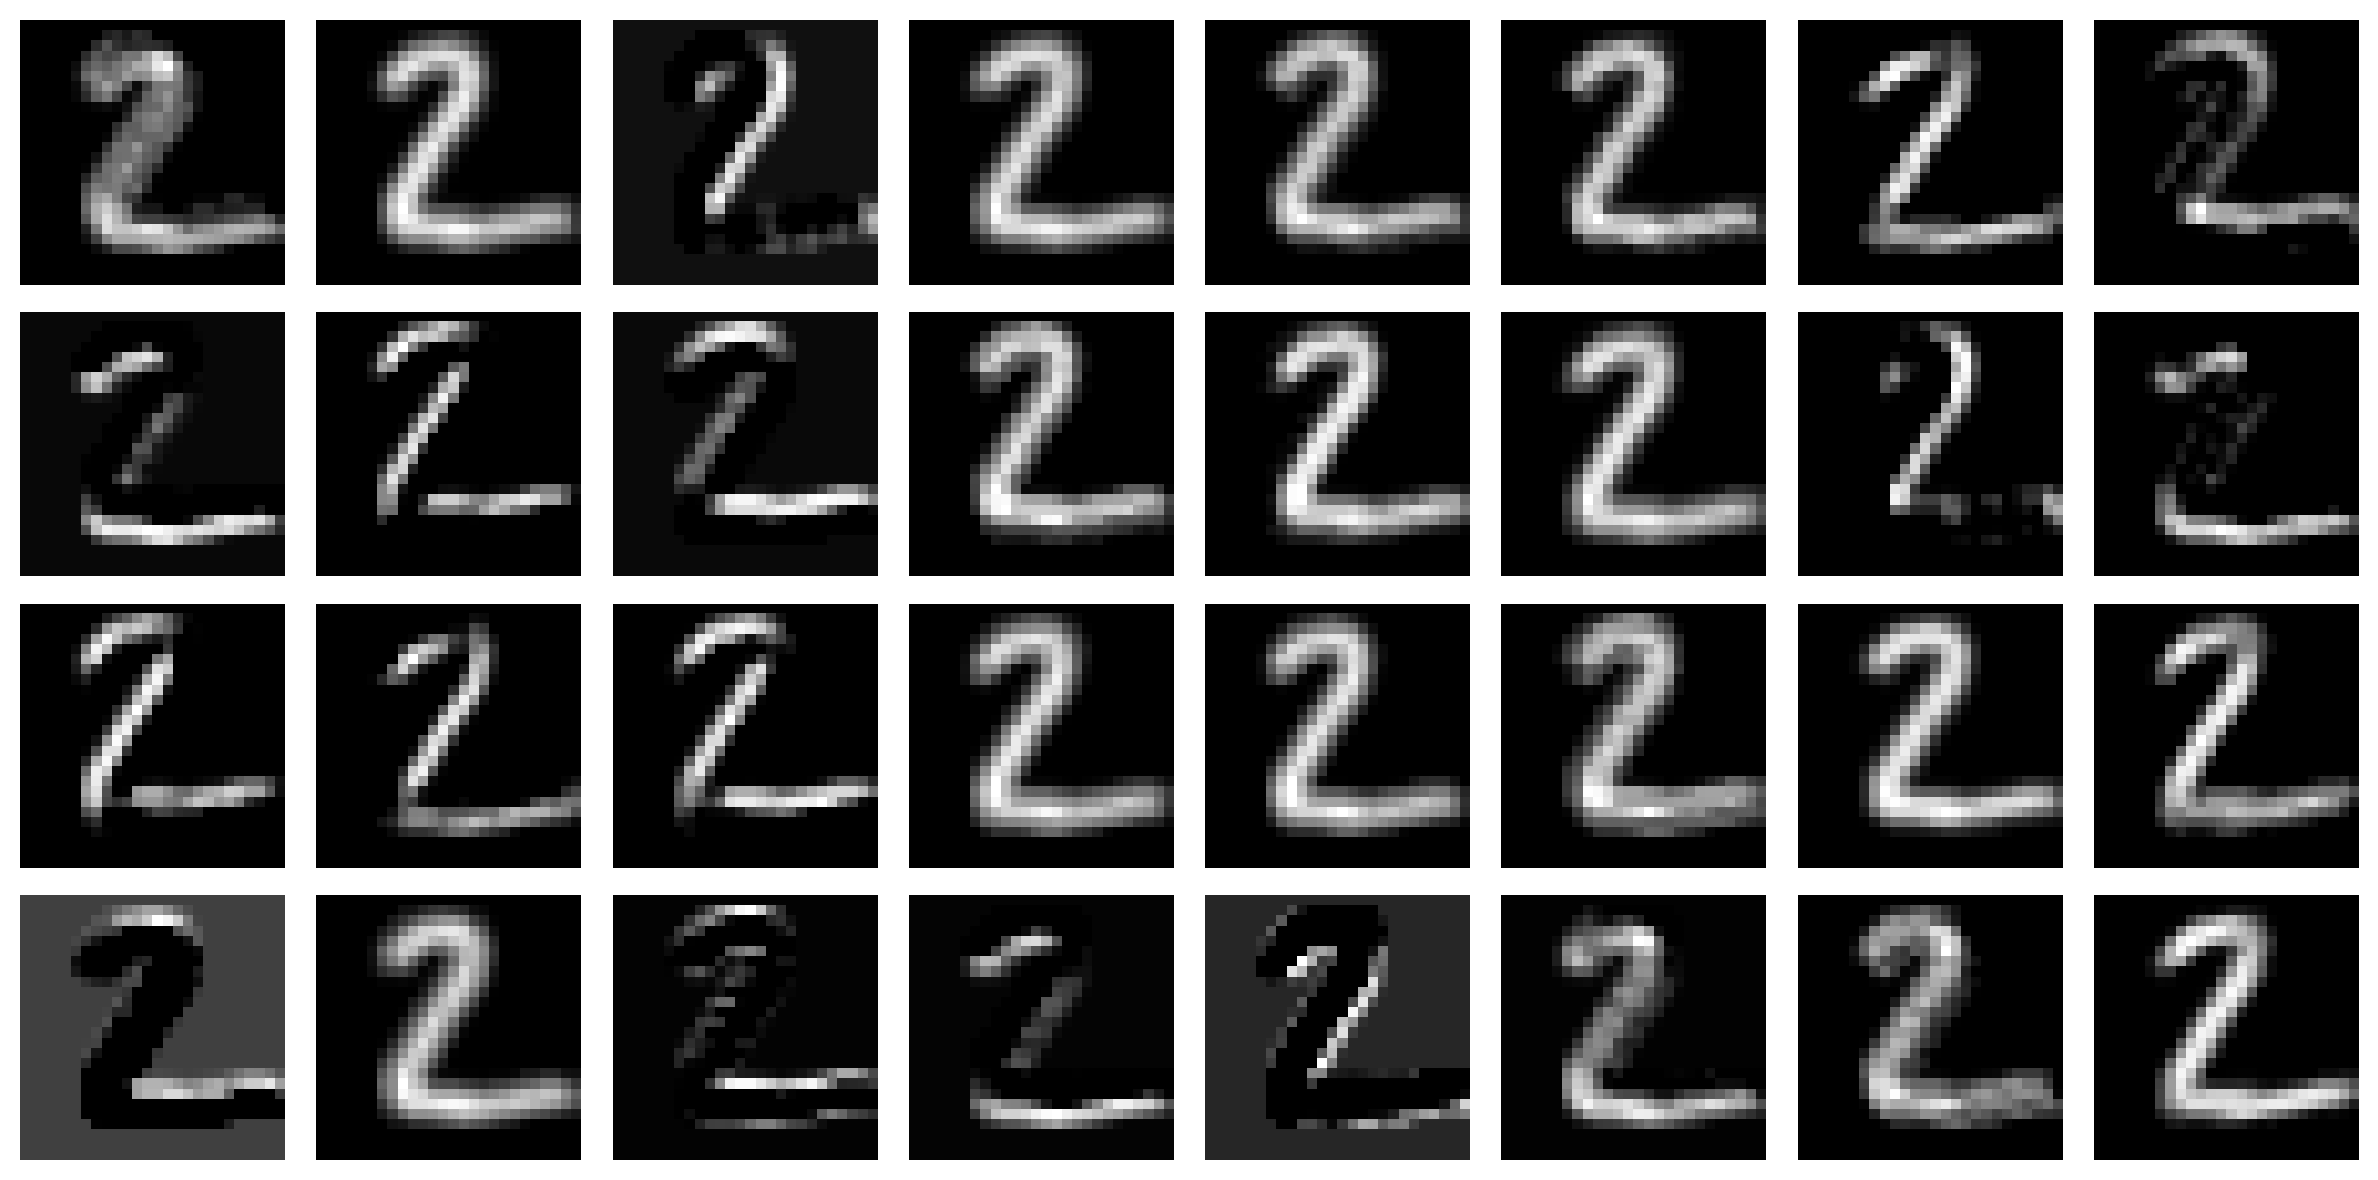

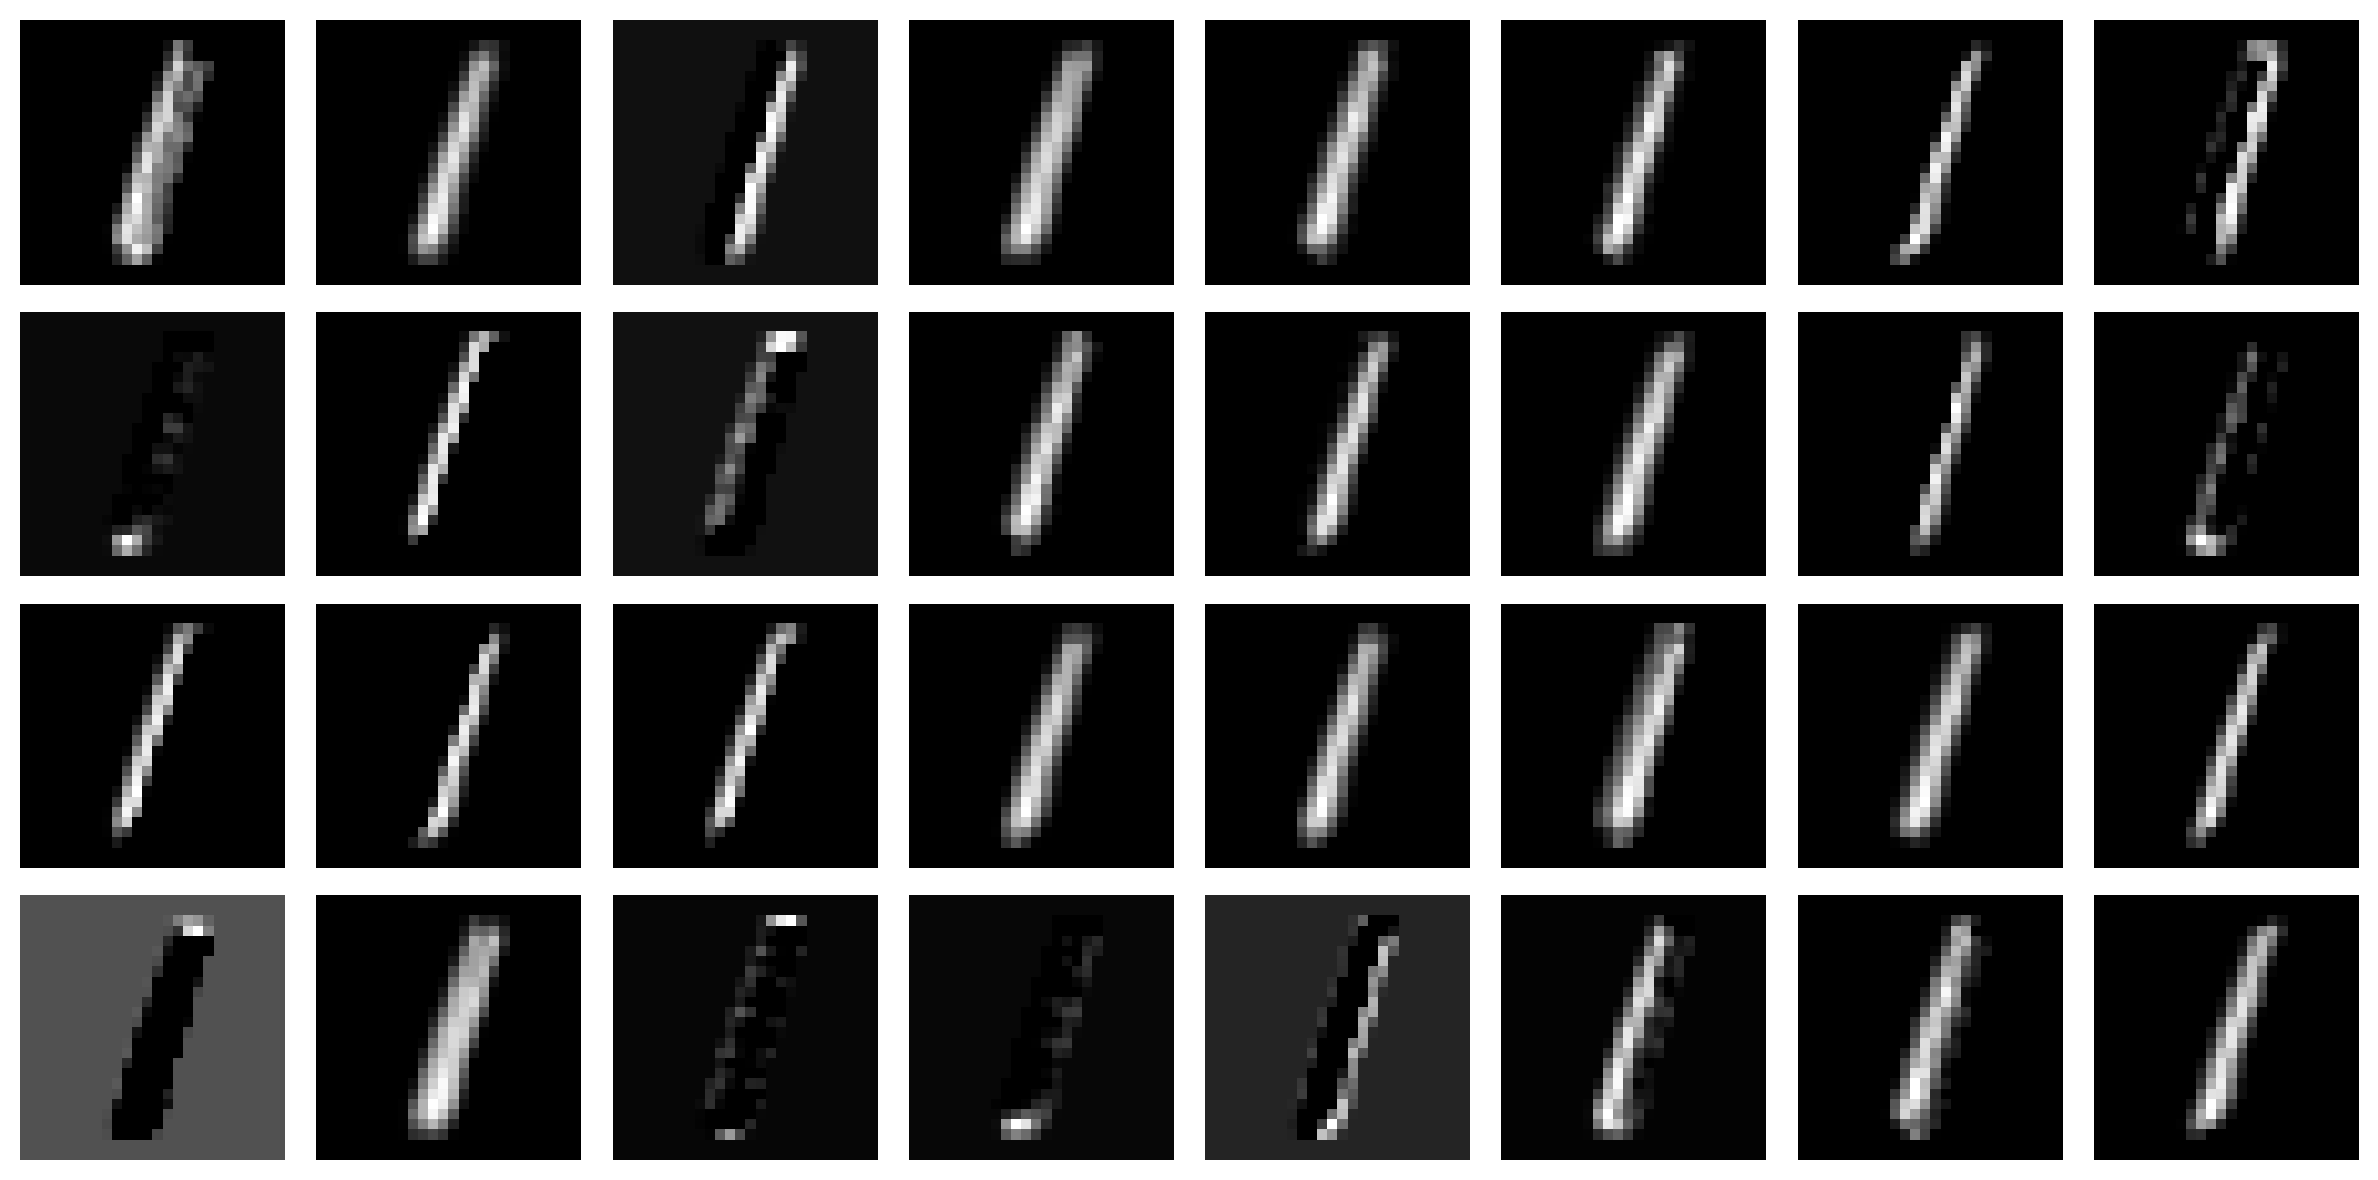

In [42]:
for img in range(3):

    # Define grid size (e.g., 4 rows, 8 columns)
    rows, cols = 4, 8
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(testout[img,:,:,i], cmap="gray")
        ax.axis("off")  # Hide axis
    
    plt.tight_layout()
    plt.show()